### Tarea 3.a
Desarrollar 3 figuras de latitud vs presión atmosférica. Graficar anomalías en formato Z-score para los períodos seleccionados

# Cross Section

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import matplotlib.colors as mcolors
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section

c:\Users\nicol\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
def OpenDataset(name):
    return xr.open_dataset(f'./Archivos NC/{name}.nc', chunks=-1)

In [3]:
# Abrimos el dataset ERA 5 que se encuentra en la carpeta '/Archivos NC/' con la funcion OpenDataset
ERA_5 = OpenDataset('ERA 5') 
ERA_5

<xarray.Dataset>
Dimensions:    (longitude: 261, latitude: 221, level: 37, time: 251)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -25.5 -25.25 -25.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... -39.5 -39.75 -40.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2023-02-01
Data variables:
    z          (time, level, latitude, longitude) float32 dask.array<chunksize=(251, 37, 221, 261), meta=np.ndarray>
    q          (time, level, latitude, longitude) float32 dask.array<chunksize=(251, 37, 221, 261), meta=np.ndarray>
    u          (time, level, latitude, longitude) float32 dask.array<chunksize=(251, 37, 221, 261), meta=np.ndarray>
    v          (time, level, latitude, longitude) float32 dask.array<chunksize=(251, 37, 221, 261), meta=np.ndarray>
    w          (time, level, latitude, longitude) float32 dask.array<chunksize=(251, 37, 221, 261), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-20 16:11:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [4]:
# Establecemos los datos en funcion de tiempo 1950-2021
CLIMATE_1950_2021 = ERA_5.sel(time=slice('1950-12-01T00:00:00.000000000','2021-02-01T00:00:00.000000000',))
CLIMATE_1950_2021

<xarray.Dataset>
Dimensions:    (longitude: 261, latitude: 221, level: 37, time: 213)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -25.5 -25.25 -25.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... -39.5 -39.75 -40.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1950-12-01 1951-01-01 ... 2021-02-01
Data variables:
    z          (time, level, latitude, longitude) float32 dask.array<chunksize=(213, 37, 221, 261), meta=np.ndarray>
    q          (time, level, latitude, longitude) float32 dask.array<chunksize=(213, 37, 221, 261), meta=np.ndarray>
    u          (time, level, latitude, longitude) float32 dask.array<chunksize=(213, 37, 221, 261), meta=np.ndarray>
    v          (time, level, latitude, longitude) float32 dask.array<chunksize=(213, 37, 221, 261), meta=np.ndarray>
    w          (time, level, latitude, longitude) float32 dask.array<chunksize=(213, 37, 221, 261), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-20 16:11:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [5]:
# Abrimos el dataset 'orography_v2'
OROGRAFIA = OpenDataset('orography_v2') 

In [6]:
# Obtenemos media de v, u, w y humedad respecto al datarrays longitud
HUMEDAD_1950_2021 = CLIMATE_1950_2021['q'].mean(dim=("longitude")) * 1000
V_1950_2021 = CLIMATE_1950_2021['v'].mean(dim=("longitude"))
U_1950_2021 = CLIMATE_1950_2021['u'].mean(dim=("longitude"))
W_1950_2021 = CLIMATE_1950_2021['w'].mean(dim=("longitude")) * -100
print(HUMEDAD_1950_2021.shape)
print(V_1950_2021.shape)
print(U_1950_2021.shape)
print(W_1950_2021.shape)

(213, 37, 221)
(213, 37, 221)
(213, 37, 221)
(213, 37, 221)


In [7]:
# Hacemos un resample en trimestre de los datos Q, V, U y W y obtenemos su promedio 
# en funcion del tiempo.
HUMEDAD_1950_2021_QS_DEC = HUMEDAD_1950_2021.resample(time='QS-DEC').mean(dim="time")
V_1950_2021_QS_DEC = V_1950_2021.resample(time='QS-DEC').mean(dim="time")
U_1950_2021_QS_DEC = U_1950_2021.resample(time='QS-DEC').mean(dim="time")
W_1950_2021_QS_DEC = W_1950_2021.resample(time='QS-DEC').mean(dim="time")


In [8]:
# Obtenemos los valores de Q, V, U y W correspondientes a Diciembre, Enero y Febrero.
HUMEDAD_1950_2021_DJF = HUMEDAD_1950_2021_QS_DEC[0::4]
V_1950_2021_DJF = V_1950_2021_QS_DEC[0::4]
U_1950_2021_DJF = U_1950_2021_QS_DEC[0::4]
W_50_2021_DJF = W_1950_2021_QS_DEC[0::4]
HUMEDAD_1950_2021_DJF


<xarray.DataArray 'q' (time: 71, level: 37, latitude: 221)>
dask.array<getitem, shape=(71, 37, 221), dtype=float32, chunksize=(1, 37, 221), chunktype=numpy.ndarray>
Coordinates:
  * latitude  (latitude) float32 15.0 14.75 14.5 14.25 ... -39.5 -39.75 -40.0
  * level     (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time      (time) datetime64[ns] 1950-12-01 1951-12-01 ... 2020-12-01

In [9]:
## calculate z-scores

# 6. TRANSFORM TO Z-SCORES

## calculate MEAN and SD

HUMIDITY_MEAN = HUMEDAD_1950_2021_DJF.mean("time")
U_MEAN = V_1950_2021_DJF.mean("time")
V_MEAN = U_1950_2021_DJF.mean("time")
W_MEAN = W_50_2021_DJF.mean("time")

HUMIDITY_STD = HUMEDAD_1950_2021_DJF.std("time")
V_STD = V_1950_2021_DJF.std("time")
U_STD = U_1950_2021_DJF.std("time")
W_STD = W_50_2021_DJF.std("time")

HUMIDITY_ZSCORE = (HUMEDAD_1950_2021_DJF-HUMIDITY_MEAN)/HUMIDITY_STD
V_ZSCORE = (V_1950_2021_DJF-U_MEAN)/V_STD
U_ZSCORE = (U_1950_2021_DJF-V_MEAN)/U_STD
W_ZSCORE = (W_50_2021_DJF-W_MEAN)/W_STD


print(HUMIDITY_ZSCORE.shape)
HUMIDITY_ZSCORE

(71, 37, 221)


<xarray.DataArray 'q' (time: 71, level: 37, latitude: 221)>
dask.array<truediv, shape=(71, 37, 221), dtype=float32, chunksize=(1, 37, 221), chunktype=numpy.ndarray>
Coordinates:
  * latitude  (latitude) float32 15.0 14.75 14.5 14.25 ... -39.5 -39.75 -40.0
  * level     (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time      (time) datetime64[ns] 1950-12-01 1951-12-01 ... 2020-12-01

In [10]:
# Obtenemos la altura a partir de las coordenas Z del dataset
ALTURA = mpcalc.geopotential_to_height(OROGRAFIA['z'])
# Obtener presion apartir de la altura
PRESION = mpcalc.height_to_pressure_std(ALTURA)
# La presión miníma corresponde a los andes.
PRESION_ANDES = PRESION.min(dim=("longitude", "time"))
PRESION_ANDES

<xarray.DataArray 'mul-a97355a4ba916e9120adbef31edcc023' (latitude: 241)>
<Quantity(dask.array<_nanmin_skip-aggregate, shape=(241,), dtype=float32, chunksize=(241,), chunktype=numpy.ndarray>, 'hectopascal')>
Coordinates:
  * latitude  (latitude) float32 20.0 19.75 19.5 19.25 ... -39.5 -39.75 -40.0

In [11]:
def obtainDataYear(year, data):
    date = np.datetime64(year)
    index = np.where(data.time == date)[0][0]
    return index


def obtainLevel(levelSearched, data):
    index = np.where(data.level == levelSearched)[0][0]
    return index


# Obtenemos los indices de los veranos 1983-1984, 2003-2004 y 2011-2012.
index1983 = obtainDataYear('1983-12-01', HUMIDITY_ZSCORE)
index2003 = obtainDataYear('2003-12-01', HUMIDITY_ZSCORE)
index2011 = obtainDataYear('2011-12-01', HUMIDITY_ZSCORE)
# Obtenemos los indices de los niveles de presion de 200, 500 y 800.
index800 = obtainLevel(800, HUMIDITY_ZSCORE)
index500 = obtainLevel(500, HUMIDITY_ZSCORE)
index200 = obtainLevel(200, HUMIDITY_ZSCORE)



In [12]:
# Asignamos las variables pertenecientes al verano 1983-1984
Q_1983_1984 = HUMIDITY_ZSCORE[index1983, :, :]
V_1983_1984 = V_ZSCORE[index1983, :, :]
U_1983_1984 = U_ZSCORE[index1983, :, :]
W_1983_1984 = W_ZSCORE[index1983, :, :]

dataFrom1983_1984 = [Q_1983_1984, U_1983_1984, V_1983_1984, W_1983_1984]

In [13]:
# Asignamos las variables pertenecientes al verano 2003-2004
Q_2003_2004 = HUMIDITY_ZSCORE[index2003, :, :]
V_2003_2004 = V_ZSCORE[index2003, :, :]
U_2003_2004 = U_ZSCORE[index2003, :, :]
W_2003_2004 = W_ZSCORE[index2003, :, :]

dataFrom2003_2004 = [Q_2003_2004, U_2003_2004, V_2003_2004, W_2003_2004]

In [14]:
# Asignamos las variables pertenecientes al verano 2011-2012
Q_2011_2012 = HUMIDITY_ZSCORE[index2011, :, :]
V_2011_2012 = V_ZSCORE[index2011, :, :]
U_2011_2012 = U_ZSCORE[index2011, :, :]
W_2011_2012 = W_ZSCORE[index2011, :, :]

dataFrom2011_2012 = [Q_2011_2012, U_2011_2012, V_2011_2012, W_2011_2012]

In [15]:
def cross_section(title, dataYear, PRESION_ANDES):
    HUMEDAD, U, V, W = dataYear[0], dataYear[1], dataYear[2], dataYear[3]
    # Contourf de Humedad especifica en rangos de presion 150 a 1000 hPa
    fig = plt.figure(1, figsize=(16., 9.))
    ax = plt.axes()

    ax.invert_yaxis()
    ax.set_xlim([-40, 15])
    ax.set_ylim([1000, 150])

    plt.yscale("log")

    # 1. Plot specific humidiy using contourf

    # set the levels for the plot

    levels_plot = np.arange(-4, 4, 0.4)

    HUMIDITY_COUNTOURF = ax.contourf(HUMEDAD["latitude"],
                                     HUMEDAD["level"],
                                     HUMEDAD,
                                     extend="both",
                                     cmap="bwr",
                                     alpha=0.7,
                                     levels=levels_plot)

    # ax.invert_yaxis()
    rh_colorbar = fig.colorbar(HUMIDITY_COUNTOURF, shrink=0.7,
                               ticks=[-4, -3, -2, -1, 0, 1, 2, 3, 4])

    # Quivers de V y W en rangos de presion 150 a 1000 hPa
    QUIVERS_U_W = ax.quiver(V['latitude'][::9],
                            V['level'],
                            V[::, ::9],
                            W[::, ::9],
                            scale=None,
                            width=0.0045,
                            color="grey",
                            pivot="mid",
                            headwidth=2.5)

    U = U.sel(level=slice(150, 1000))

    # Contour de U en rangos de presion 150 a 1000 hPa
    U_CONTOUR = ax.contour(U['latitude'],
                           U['level'],
                           U,
                           linewidths=1.5,
                           levels=10,
                           colors="k")

    # Añadir etiquetas
    ax.clabel(U_CONTOUR, U_CONTOUR.levels, inline=True, fontsize=15)

    # Enmarcar maxima elevacion de los andes.
    ax.fill_between(PRESION_ANDES.latitude,
                    PRESION_ANDES, np.ones(len(PRESION_ANDES))*1000,
                    lw=8, color='w', zorder=1000,
                    alpha=0.8)

    cordillera = PRESION_ANDES.plot(linewidth=3, color="black")
    plt.title('{title}'.format(title=title))
    plt.savefig(f"{title}_crossSection_V1.svg", bbox_inches='tight')
    # Save the plot as a PNG file
    plt.savefig(f"{title}_crossSection_V1.png", bbox_inches='tight')

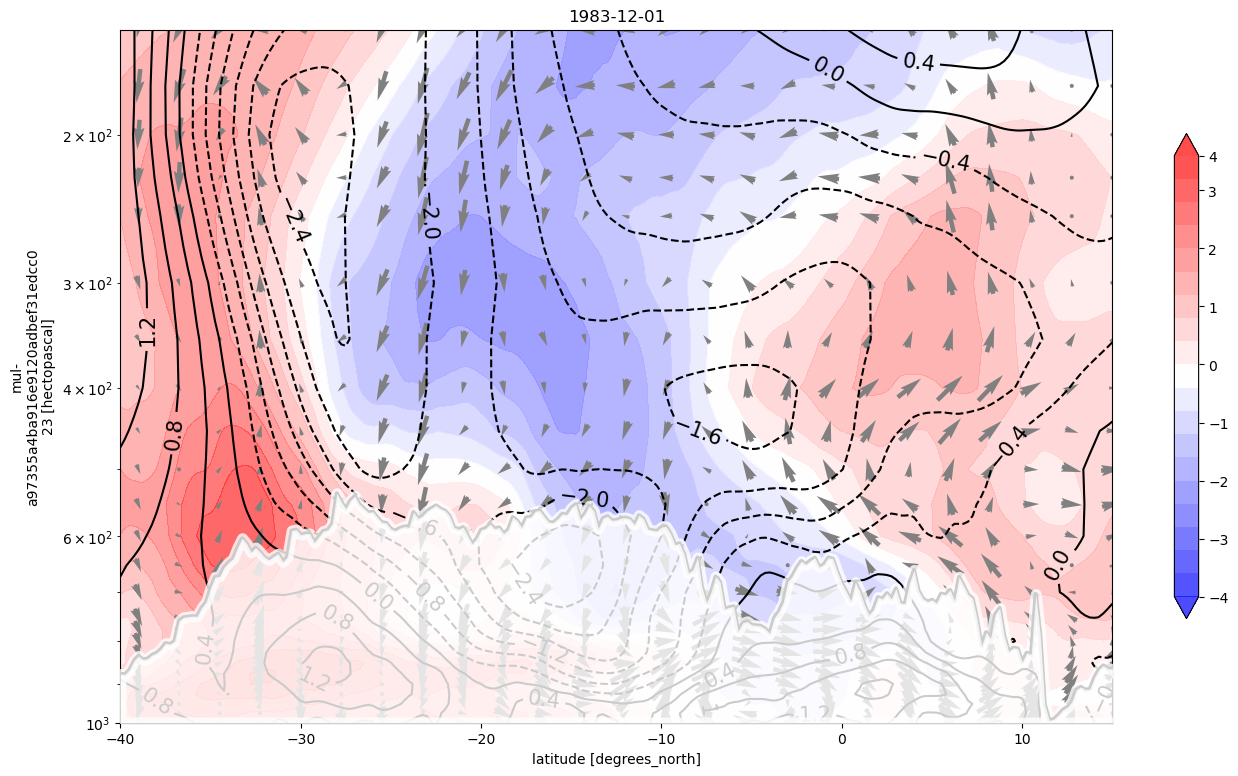

In [16]:
cross_section('1983-12-01', dataFrom1983_1984, PRESION_ANDES)

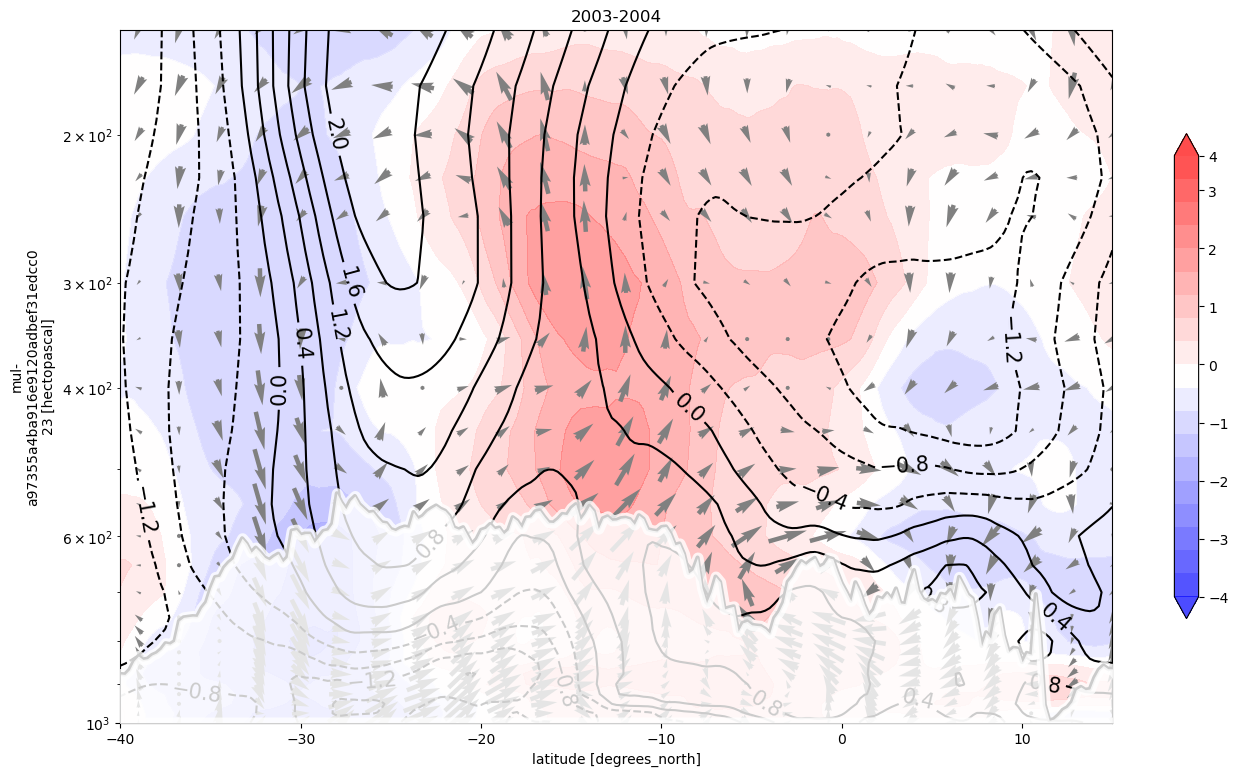

In [17]:
cross_section('2003-2004', dataFrom2003_2004, PRESION_ANDES)

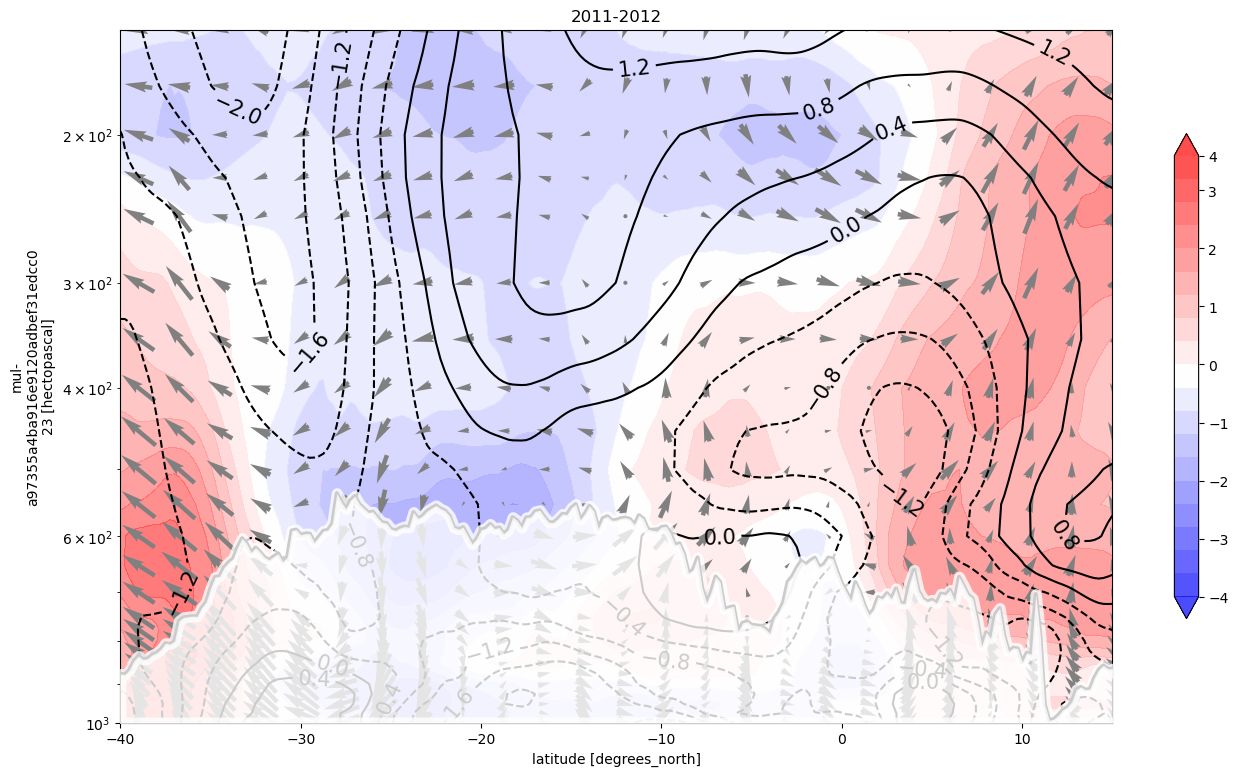

In [18]:
cross_section('2011-2012', dataFrom2011_2012, PRESION_ANDES)